# 线性判别分析进行二分类

LDA的思想非常朴素：给定训练样例集，设法将样例投影到一条直线${\omega}$上，使得同类样例的投影点尽可能靠近、异类样例点尽可能远离；在对新样本进行分类时，将其投影到直线${\omega}$上，再根据投影点的位置来确定新样本的类别。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = 'ex2data3.txt'
data = pd.read_csv(path, header=None, names=['x1', 'x2', 'result'])
data.head()

,x1,x2,result
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


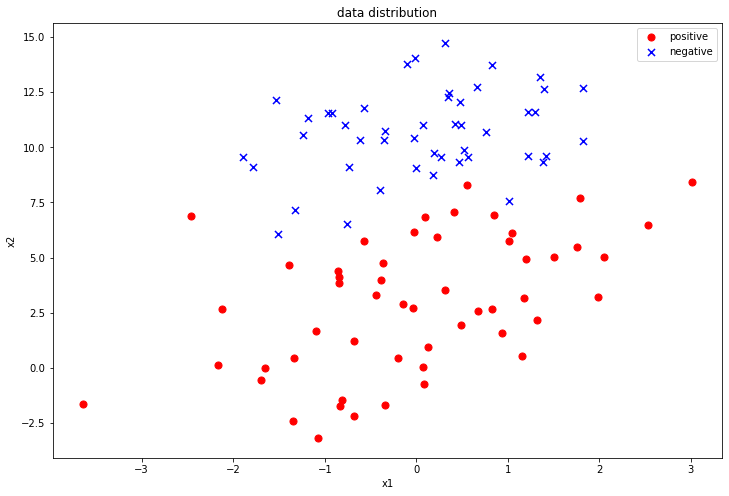

In [3]:
positive = data[data['result'].isin([1])]
negative = data[data['result'].isin([0])]
plt.figure(figsize=(12, 8))
plt.scatter(positive['x1'], positive['x2'], c='r', s=50, marker='o', label = 'positive')
plt.scatter(negative['x1'], negative['x2'], c='b', s=50, marker='x', label = 'negative')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('data distribution')
plt.show()

令${X}_{i}$、${\mu}_{i}$、${\Sigma}_{i}$分别表示第${i}$类示例的集合、均值向量、协方差矩阵。若将数据投影到直线${\omega}$上，则两类样本的中心在直线上的投影分别是${\omega}^{T}{\mu}_{0}$和${\omega}^{T}{\mu}_{1}$;协方差分别是${\omega}^{T}{\Sigma}_{0}{\omega}$和${\omega}^{T}{\Sigma}_{1}{\omega}$。

想要使同类样例投影点尽可能接近，可以让同类投影点的协方差尽可能小，即${\omega}^{T}{\Sigma}_{0}{\omega}+{\omega}^{T}{\Sigma}_{1}{\omega}$尽可能小；而想要使异类样例的投影点尽可能远离，可以让类中心之间的距离尽可能大，即${||{\omega}^{T}{\mu}_{0}-{\omega}^{T}{\mu}_{1}||}_{2}^{2}$尽可能大。同时考虑两者，则可以得到最大化目标：
$${J}\left({\omega}\right)=\frac{{||{\omega}^{T}{\mu}_{0}-{\omega}^{T}{\mu}_{1}||}_{2}^{2}}{{\omega}^{T}{\Sigma}_{0}{\omega}+{\omega}^{T}{\Sigma}_{1}{\omega}}=\frac{{\omega}^{T}{\left({\mu}_{0}-{\mu}_{1}\right)}{{\left({\mu}_{0}-{\mu}_{1}\right)}^{T}}{\omega}}{{\omega}^{T}\left({\Sigma}_{0}+{\Sigma}_{1}\right){\omega}}$$

定义“类内散度矩阵”
$${S}_{\omega}={\Sigma}_{0}+{\Sigma}_{1}$$
定义“类间散度矩阵”
$${S}_{b}={\left({\mu}_{0}-{\mu}_{1}\right)}{\left({\mu}_{0}-{\mu}_{1}\right)}^{T}$$
所以目标函数可重写为
$${J}\left({\omega}\right)=\frac{{\omega}^{T}{S}_{b}{\omega}}{{\omega}^{T}{S}_{\omega}{\omega}}$$

观察目标函数可知，分子分母都是关于${\omega}$的二次项，所以该最大化解和${\omega}$的长度无关，只和方向有关。可以令${\omega}^{T}{S}_{\omega}{\omega}=1$,目标函数又可写为
$${\underset {x}{\operatorname {arg\,min}}}-{\omega}^{T}{S}_{b}{\omega}$$
$${s.t.}{\omega}^{T}{S}_{\omega}{\omega}=1$$
由拉格朗日乘子法，上式等价于
$${S}_{b}{\omega}={\lambda}{S}_{\omega}{\omega}$$
其中${S}_{b}{\omega}={\left({\mu}_{0}-{\mu}_{1}\right)}{\left({\mu}_{0}-{\mu}_{1}\right)}^{T}{\omega}$的后两项相乘是实数，即${S}_{b}{\omega}$的方向恒为${\mu}_{0}-{\mu}_{1}$。不妨令
$${S}_{b}{\omega}={\lambda}\left({\mu}_{0}-{\mu}_{1}\right)$$
代入上式可得
$${\omega}={S}_{\omega}^{-1}\left({\mu}_{0}-{\mu}_{1}\right)$$

In [4]:
cols = data.shape[1]
positive = positive.iloc[:, 0:cols-1]
negative = negative.iloc[:, 0:cols-1]

positive = np.array(positive.values)
negative = np.array(negative.values)

求两类型样例的均值向量

In [5]:
mu0 = np.mean(negative, axis=0)#压缩行
mu1 = np.mean(positive, axis=0)

求两类型样例的协方差矩阵

In [6]:
Sigma0 = (negative-mu0).T@(negative-mu0)
Sigma1 = (positive-mu1).T@(positive-mu1)

求类内散度矩阵

In [7]:
S_w = Sigma0+Sigma1
S_w

array([[135.35903647, 131.52568101],
       [131.52568101, 660.67023227]])

np.array对象求逆：np.linalg.inv(a)；求伪逆：np.linalg.pinv(a)  
np.matrix对象求逆：a.I

In [8]:
S_w_inv = np.linalg.inv(S_w)
S_w_inv

array([[ 0.00915961, -0.00182349],
       [-0.00182349,  0.00187663]])

求得直线${\omega}$

In [9]:
W = S_w_inv@(mu0-mu1).T
W

array([-0.01313392,  0.01426317])

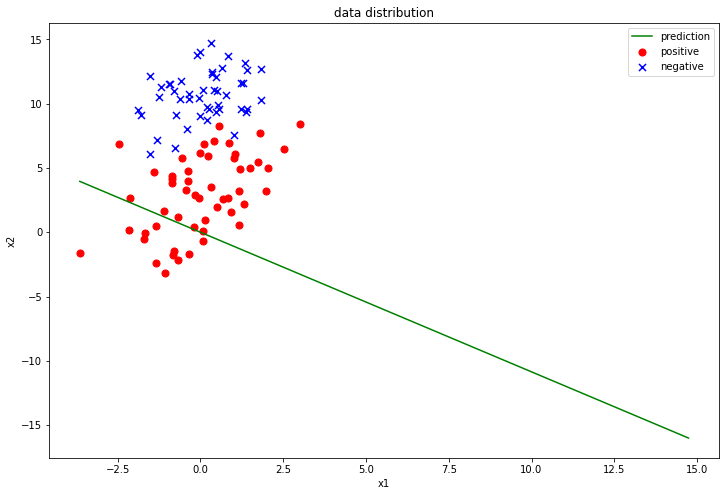

In [10]:
k = W[1]/W[0]#直线w的斜率
x = np.linspace(data['x1'].min(), data['x2'].max())
f = k*x

plt.figure(figsize=(12, 8))
plt.scatter(positive[:, 0], positive[:, 1], c='r', s=50, marker='o', label = 'positive')
plt.scatter(negative[:, 0], negative[:, 1], c='b', s=50, marker='x', label = 'negative')
plt.plot(x, f, c='g', label='prediction')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('data distribution')
plt.show()

预测函数。把数据样例投影到直线${\omega}$上，比较和两类样本中心投影的距离进行判定。

In [11]:
def predict(W, X):
    data_projection = W@X.T
    positive_projection = W@mu1.T
    negative_projection = W@mu0.T
    positive_distance = np.power(data_projection - positive_projection, 2) #数据样例投影到1类中心投影的欧氏距离
    negative_distance = np.power(data_projection - negative_projection, 2) #数据样例投影到0类中心投影的欧氏距离
    compare = positive_distance - negative_distance #比较距离大小
    return [1 if x < 0 else 0 for x in compare]

In [12]:
X = np.array(data.iloc[:, 0:cols-1].values)
y = np.array(data.iloc[:, cols-1:cols].values)

In [13]:
predictions = predict(W, X) #返回list对象
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 97%
